In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
df=pd.read_csv('Data.csv',header=0,sep=',')
mycolors = ['#002856', '#EAC71B']
df


,Unnamed: 0,ID,Name,Team,GP,Minute,Points,FGM,FGA,FG_P,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,BIO
0,0,1,Luka Doncic,DAL,34,36.9,34.2,11.6,22.7,51.1,...,73.5,1.0,7.7,8.7,8.9,1.7,0.6,3.6,36.6,non
1,1,2,Joel Embiid,PHI,27,35.4,33.2,11.1,21.0,52.8,...,84.8,1.8,8.0,9.8,4.6,1.2,1.7,3.9,34.9,PROFESSIONAL CAREER\nHolds career averages of ...
2,2,3,Giannis Antetokounmpo,MIL,30,33.7,32.1,11.5,21.5,53.3,...,64.5,2.3,9.6,11.8,5.2,0.9,0.9,3.8,32.4,PROFESSIONAL CAREER\n2018-19 NBA MVP 3-time NB...
3,3,4,Jayson Tatum,BOS,35,36.9,30.9,10.1,21.4,47.3,...,85.5,1.1,7.0,8.1,4.1,1.2,0.9,2.7,29.8,PROFESSIONAL CAREER\n2019-20: Appeared in 66 g...
4,4,5,Shai Gilgeous-Alexander,OKC,33,35.7,30.8,10.3,20.6,49.9,...,91.3,0.9,4.0,4.8,5.8,1.7,1.0,3.3,29.6,PROFESSIONAL CAREER\nLed all rookies on +.500 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,2562,255,Quincy Acy,SAC,63,13.5,2.7,1.0,2.2,46.8,...,66.0,1.1,2.3,3.4,0.4,0.4,0.4,0.5,5.4,non
2563,2563,256,Ryan Hollins,LAC,61,7.9,2.3,0.9,1.2,73.6,...,62.5,0.5,1.0,1.5,0.1,0.1,0.5,0.5,3.4,non
2564,2564,257,Chuck Hayes,TOR,61,12.3,2.2,0.9,2.1,43.1,...,80.0,1.1,2.3,3.4,0.6,0.6,0.2,0.5,5.1,non
2565,2565,258,Garrett Temple,WAS,75,8.5,1.8,0.7,1.9,36.2,...,69.8,0.3,0.6,0.9,1.0,0.5,0.1,0.6,2.4,non


In [9]:
df.info()
df.duplicated().sum()# test for duplicated lines 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2567 non-null   int64  
 1   ID          2567 non-null   int64  
 2   Name        2567 non-null   object 
 3   Team        2567 non-null   object 
 4   GP          2567 non-null   int64  
 5   Minute      2567 non-null   float64
 6   Points      2567 non-null   float64
 7   FGM         2567 non-null   float64
 8   FGA         2567 non-null   float64
 9   FG_P        2567 non-null   float64
 10  3PM         2567 non-null   float64
 11  3PA         2567 non-null   float64
 12  3P%         2567 non-null   float64
 13  FTM         2567 non-null   float64
 14  FTA         2567 non-null   float64
 15  FT%         2567 non-null   float64
 16  OREB        2567 non-null   float64
 17  DREB        2567 non-null   float64
 18  REB         2567 non-null   float64
 19  AST         2567 non-null  

0

(array([ 30.,  40.,  36.,  56.,  52.,  39.,   9.,   0.,   0.,   0.,   1.,
          3.,   5.,  31.,  32.,  42.,  93., 120., 156.,  81., 156., 179.,
        180., 152., 199., 172., 172., 163., 224., 144.]),
 array([26. , 27.9, 29.8, 31.7, 33.6, 35.5, 37.4, 39.3, 41.2, 43.1, 45. ,
        46.9, 48.8, 50.7, 52.6, 54.5, 56.4, 58.3, 60.2, 62.1, 64. , 65.9,
        67.8, 69.7, 71.6, 73.5, 75.4, 77.3, 79.2, 81.1, 83. ]),
 <BarContainer object of 30 artists>)

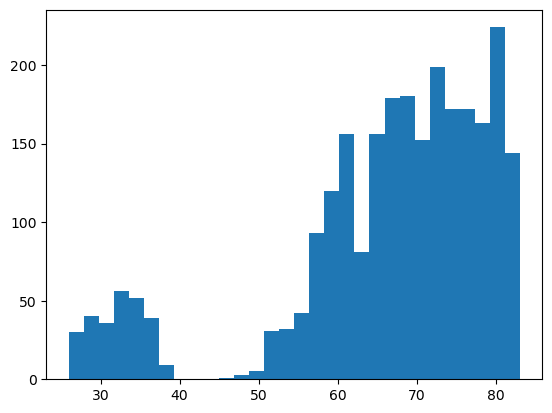

In [10]:
plt.hist(df["GP"],bins=30)#שכיחות כמות משחקים ששוחקו ביחס לכמות מופעים 


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  3.,  2.,
         6.,  1.,  2.,  3.,  4.,  5., 10.,  7., 15., 10., 13.,  7.,  9.,
        22., 20., 27., 18., 24., 35., 27., 29., 36., 31., 44., 26., 27.,
        41., 33., 39., 51., 26., 46., 35., 32., 33., 33., 38., 27., 32.,
        49., 28., 41., 25., 31., 45., 39., 34., 47., 37., 36., 51., 35.,
        37., 47., 33., 61., 33., 38., 37., 31., 50., 29., 36., 53., 31.,
        54., 37., 43., 45., 34., 37., 43., 42., 47., 35., 31., 39., 22.,
        30., 29., 15., 19.,  2.,  4.,  5.,  2.,  4.]),
 array([ 4.9  ,  5.238,  5.576,  5.914,  6.252,  6.59 ,  6.928,  7.266,
         7.604,  7.942,  8.28 ,  8.618,  8.956,  9.294,  9.632,  9.97 ,
        10.308, 10.646, 10.984, 11.322, 11.66 , 11.998, 12.336, 12.674,
        13.012, 13.35 , 13.688, 14.026, 14.364, 14.702, 15.04 , 15.378,
        15.716, 16.054, 16.392, 16.73 , 17.068, 17.406, 17.744, 18.082,
        18.42 , 18.758, 19.096, 19.434, 19.772, 20.11 , 20.448, 20.786,
  

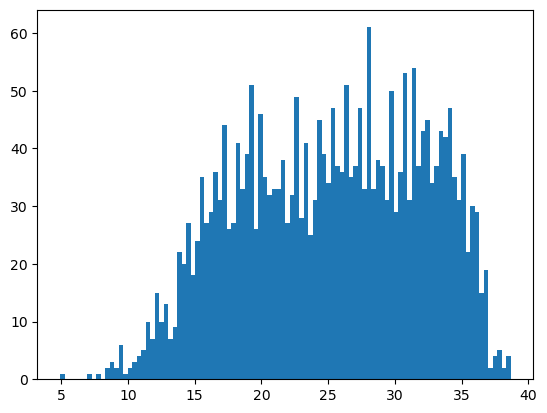

In [11]:
plt.hist(df["Minute"],bins=100)#שכיחות של דקות משחק ביחס לכמות למופעים

In [13]:

# Select only the rows of the dataframe that correspond to the player you want to plot in a different color
player_df = df[df['Name'] == ['LeBron James']]

# Extract the FGA and FGM columns from the dataframe
FGA = player_df['FGA']
FGM = player_df['FGM']

# Create a scatter plot for the player you want to plot in a different color
plt.scatter(FGA, FGM, c='red', label='LeBron James')

# Select all the rows of the dataframe except for the player you want to plot in a different color
other_players_df = df[df['Name'] != 'LeBron James']

# Extract the FGA and FGM columns from the dataframe
FGA = other_players_df['FGA']
FGM = other_players_df['FGM']

# Create a scatter plot for the other players
plt.scatter(FGA, FGM, c='blue', label='Other Players')

# Add a title and axis labels
plt.title('Field Goal Attempts and Makes')
plt.xlabel('Field Goal Attempts')
plt.ylabel('Field Goals Made')

# Add a legend
plt.legend()

# Show the plot
plt.show()



ValueError: ('Lengths must match to compare', (2567,), (1,))

In [14]:
# אפשר לחשב E[X] עי כמות זריקות לחלק כמות קליעות כפול סיגמה שרצה על כמות השחקנים  
#נחשב הסתברות לבחירת שחקן שקלע למעלה מ11 קליעות במשחק
df.FGM[df.FGM>10].count()/df.FGM.count()

0.01090767432800935

In [15]:
#sns.boxplot(df.GP)
df.describe(include='all')

,Unnamed: 0,ID,Name,Team,GP,Minute,Points,FGM,FGA,FG_P,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,BIO
count,2567.000000,2567.000000,2567,2567,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,...,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567
unique,NaN,NaN,741,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310
top,NaN,NaN,Harrison Barnes,SAS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non
freq,NaN,NaN,10,101,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1176
mean,1283.000000,129.189326,NaN,NaN,66.133619,25.213635,11.450604,4.227152,9.136424,46.519322,...,76.110986,1.069653,3.521387,4.589014,2.499961,0.803350,0.499649,1.430541,12.944916,NaN
std,741.173394,74.697358,NaN,NaN,13.847420,6.848963,5.928296,2.097149,4.426886,6.623254,...,10.036616,0.843356,1.795745,2.466582,1.927587,0.390241,0.445297,0.800678,6.009578,NaN
min,0.000000,1.000000,NaN,NaN,26.000000,4.900000,1.000000,0.300000,0.800000,30.500000,...,0.000000,0.000000,0.500000,0.700000,0.100000,0.100000,0.000000,0.200000,1.300000,NaN
25%,641.500000,65.000000,NaN,NaN,61.000000,19.550000,7.000000,2.700000,5.700000,42.100000,...,70.800000,0.500000,2.200000,2.800000,1.100000,0.500000,0.200000,0.800000,8.600000,NaN
50%,1283.000000,129.000000,NaN,NaN,69.000000,25.600000,10.100000,3.700000,8.200000,45.100000,...,77.800000,0.800000,3.100000,4.000000,1.800000,0.700000,0.400000,1.300000,11.800000,NaN
75%,1924.500000,193.000000,NaN,NaN,76.000000,31.000000,14.600000,5.500000,11.800000,49.300000,...,83.300000,1.400000,4.300000,5.700000,3.300000,1.000000,0.600000,1.800000,16.100000,NaN


In [16]:
bins=[0,10,20,30,40]#0<x<=n
labels=[1,2,3,4]
df['EFF_binned']=pd.cut(df['EFF'],bins,labels=labels)
df['Minute_binned']=pd.cut(df['Minute'],bins,labels=labels)
df.EFF_binned.max()
df.head()

,Unnamed: 0,ID,Name,Team,GP,Minute,Points,FGM,FGA,FG_P,...,DREB,REB,AST,STL,BLK,TOV,EFF,BIO,EFF_binned,Minute_binned
0,0,1,Luka Doncic,DAL,34,36.9,34.2,11.6,22.7,51.1,...,7.7,8.7,8.9,1.7,0.6,3.6,36.6,non,4,4
1,1,2,Joel Embiid,PHI,27,35.4,33.2,11.1,21.0,52.8,...,8.0,9.8,4.6,1.2,1.7,3.9,34.9,PROFESSIONAL CAREER\nHolds career averages of ...,4,4
2,2,3,Giannis Antetokounmpo,MIL,30,33.7,32.1,11.5,21.5,53.3,...,9.6,11.8,5.2,0.9,0.9,3.8,32.4,PROFESSIONAL CAREER\n2018-19 NBA MVP 3-time NB...,4,4
3,3,4,Jayson Tatum,BOS,35,36.9,30.9,10.1,21.4,47.3,...,7.0,8.1,4.1,1.2,0.9,2.7,29.8,PROFESSIONAL CAREER\n2019-20: Appeared in 66 g...,3,4
4,4,5,Shai Gilgeous-Alexander,OKC,33,35.7,30.8,10.3,20.6,49.9,...,4.0,4.8,5.8,1.7,1.0,3.3,29.6,PROFESSIONAL CAREER\nLed all rookies on +.500 ...,3,4


(array([ 952.,    0.,    0., 1280.,    0.,    0.,  301.,    0.,    0.,
          34.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

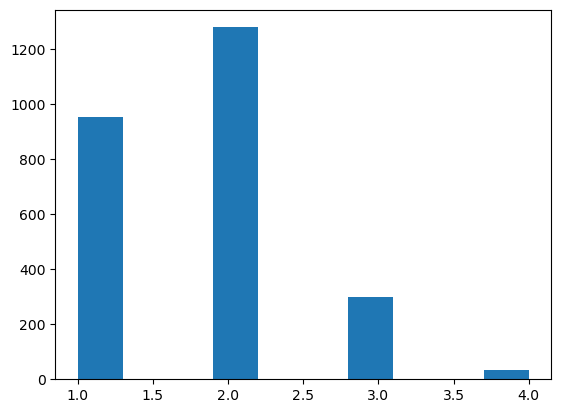

In [17]:
plt.hist(df["EFF_binned"])#EFF frequency by division into 4 groups

In [18]:
df.EFF_binned[df.EFF_binned>=4].count()/df.EFF_binned.count()#הסתברות לקבלת שחקן מקבוצה 4
df.FGM[df.EFF_binned>=4]
filtered_df = df[df.EFF_binned >= 4]
print(filtered_df)

      Unnamed: 0  ID                   Name Team  GP  Minute  Points   FGM  \
0              0   1            Luka Doncic  DAL  34    36.9    34.2  11.6   
1              1   2            Joel Embiid  PHI  27    35.4    33.2  11.1   
2              2   3  Giannis Antetokounmpo  MIL  30    33.7    32.1  11.5   
5              5   6          Stephen Curry  GSW  26    34.4    30.0  10.1   
6              6   7           Kevin Durant  BKN  35    36.2    29.7  10.6   
17            17  18           Nikola Jokic  DEN  33    33.6    25.7   9.6   
50            50  51       Domantas Sabonis  SAC  34    33.8    18.6   6.9   
262          262   1            Joel Embiid  PHI  68    33.8    30.6   9.8   
263          263   2  Giannis Antetokounmpo  MIL  67    32.9    29.9  10.3   
267          267   6           Nikola Jokic  DEN  74    33.5    27.1  10.3   
493          493   4            Joel Embiid  PHI  51    31.1    28.5   9.0   
494          494   5  Giannis Antetokounmpo  MIL  61    33.0    

(14074.457269978102,
 0.771321807211279,
 14200,
 array([[0.00623296, 0.00623296, 0.01246591, ..., 0.00623296, 0.00623296,
         0.00623296],
        [0.00545384, 0.00545384, 0.01090767, ..., 0.00545384, 0.00545384,
         0.00545384],
        [0.0077912 , 0.0077912 , 0.01558239, ..., 0.0077912 , 0.0077912 ,
         0.0077912 ],
        ...,
        [0.04674718, 0.04674718, 0.09349435, ..., 0.04674718, 0.04674718,
         0.04674718],
        [0.05531749, 0.05531749, 0.11063498, ..., 0.05531749, 0.05531749,
         0.05531749],
        [0.00077912, 0.00077912, 0.00155824, ..., 0.00077912, 0.00077912,
         0.00077912]]))

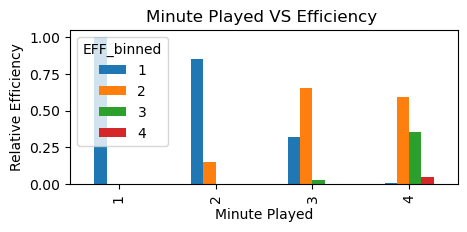

In [19]:
ct2=pd.crosstab(df['Minute_binned'],df['EFF_binned'],normalize='index')
ct1=pd.crosstab(df['GP'],df['EFF'])
ct2
ct2.plot(kind='bar',figsize=(5,2))
plt.title('Minute Played VS Efficiency ')
plt.xlabel('Minute Played')
plt.ylabel('Relative Efficiency')#מוזר לראות שכמות המשחקים ששחקן שיחק ורמת היעלות של השחקן
chi2_contingency(ct1)# אינם תלוים זה בזה על פי מבחן חי בריבוע
#ct1=pd.crosstab(df['Minute'],df['FTA'])
#chi2_contingency(ct1)

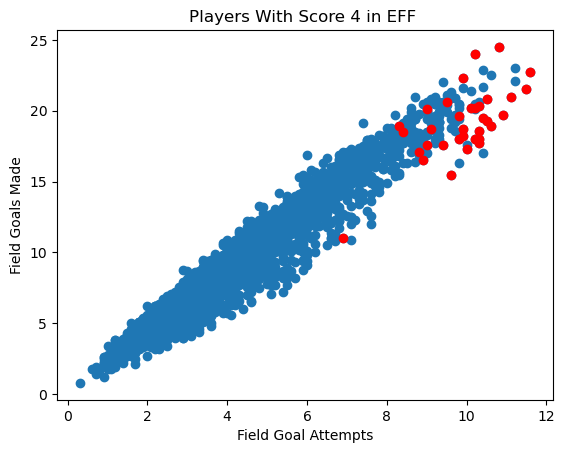

In [20]:
fig=plt.figure()
ax=plt.axes()
ax.scatter(df.FGM,df.FGA)
plt.title('Players With Score 4 in EFF ')
plt.xlabel('Field Goal Attempts')
plt.ylabel('Field Goals Made')
ax.scatter(df.FGM[df.EFF_binned>=4],df.FGA[df.EFF_binned>=4],c='red')
plt.show()

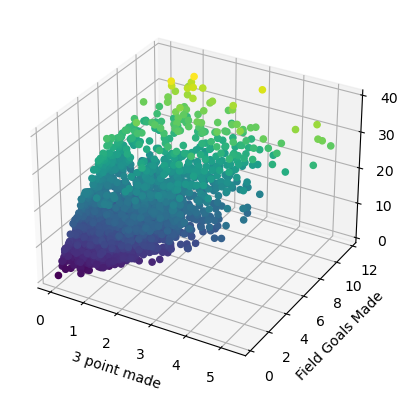

In [21]:
ax=plt.axes(projection='3d')
xdata=df['3PM']
ydata=df.FGM
zdata=df.EFF
plt.xlabel('3 point made')
plt.ylabel('Field Goals Made')
ax.scatter3D(xdata,ydata,zdata,c=zdata,depthshade=False)

In [22]:
#df[df['BIO'] == 'non']
df.BIO[df.BIO=="non"].count()

1176

In [23]:
dfa=pd.read_csv('ASN.csv',header=0,sep=',')
dfa


,Unnamed: 0,Player Name
0,0,Stephen Curry
1,1,LeBron James
2,2,Giannis Antetokounmpo
3,3,DeMar DeRozan
4,4,Nikola Jokic
...,...,...
78,78,Kevin Garnett
79,79,Luol Deng
80,80,Tyson Chandler
81,81,Jrue Holiday


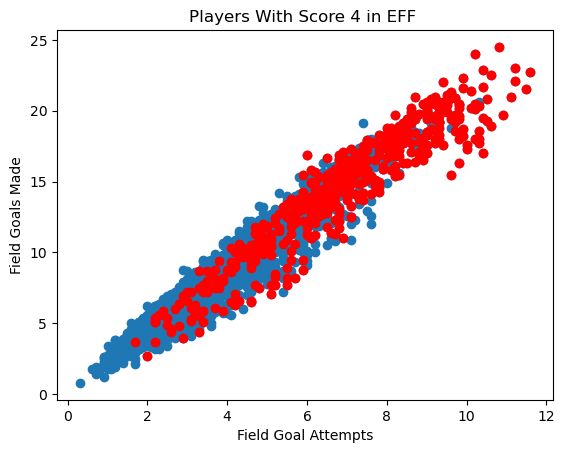

In [24]:
df['Is All-Star'] = 0
df.head()
for name in dfa['Player Name']:
    df.loc[df['Name'] == name, 'Is All-Star'] = 1

fig=plt.figure()
ax=plt.axes()
ax.scatter(df.FGM,df.FGA)
plt.title('Players With Score 4 in EFF ')
plt.xlabel('Field Goal Attempts')
plt.ylabel('Field Goals Made')
ax.scatter(df.FGM[df['Is All-Star']==1],df.FGA[df['Is All-Star']==1],c='red')
plt.show()
df.rename(columns={'Is All-Star': 'ASN'}, inplace=True)

#df.FGM[[df.FGM>10]].count()


In [37]:
df.head()
#df.drop(columns=['ASN'], inplace=True)
#df.FGM[[df.FGM>10]].count()
#df.ASN[[df.ASN==True]].count()
x=0
for x in df.ASN:
    if(df.ASN==True):
        x++
        
        
print(x)

SyntaxError: invalid syntax (2618201444.py, line 8)